## PSU DS 200 
## Project Utility Jupyter Notebook 2B
### November 21, 2019
### Instructor: John Yen

#### This Jupyter Notebook is intended to be used to construct Project Deliverables #2 for the Mini-project of DS 200. 

## The goal of this utility is to generate word clouds from labelled tweets

#### Acknowledgement: The datascience module is developed by University of California Berkeley for its data 8 course.

#### Why generating word clouds?
- Word clouds provide a visualization that reflect the frequency of words through the font size of the word.
- Word clouds of each class can be compared with important features identified by decision trees.
- For example, the following questions can be asked:
    * Are important features in the word cloud?
    * Are there frequent words (i.e., words with large font in the word cloud) that are not important features?  If so, why?


In [1]:
!pip install datascience

### Install Wordcloud
We also need install the wordcloud python module

In [2]:
!pip install wordcloud

     |████████████████████████████████| 358kB 4.1MB/s eta 0:00:01


In [3]:
import datascience
import numpy as np
import graphviz

from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 


from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

from graphviz import *

import pandas as pd
import numpy as np

from sklearn.externals import joblib

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [5]:
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning )

In [7]:
t1 = Table.read_table("LabelledTweets.csv", sep =',')
t1.show(10)

Text,Support
RT @kasserolees: Energy is the #1 contributer to climate ...,1
RT @edelman_barbara: @msnbc why don t you have a climate ...,1
RT @OtagoGrad: @anthonyfurey @OskieOckham The data doesn ...,0
The Dow just recorded its 3rd worst day ever. Think @rea ...,0
RT @SimonBanksHB: I am not going to rule out things base ...,0
RT @sydneyleemarco: nothing like an 80 degree october da ...,1
@MerlenesMemos @CNN It's not an act of god. Climate chan ...,1
RT @MikeLevinCA: When asked about climate change my GOP ...,0
RT @gq_jayq: Bet I got 11 years to run it up https://t.c ...,0
No they care about the oil billionaires,0


### The code below extract the "class label" from the CSV file to find out the total number of positive/supportive vs negative/non-supportive tweets in the labelled data set.
### If you use Climage Change tweets, the column label for the class label is 'Support'.
### If you use Airline Sentiment tweets, the column label for the class label is 'airline_sentiment' (as shown in Lab9)

In [8]:
t1_positive = t1.where('Support', are.equal_to(1))
t1_negative = t1.where('Support', are.equal_to(0))
t1_positive

Text,Support
RT @kasserolees: Energy is the #1 contributer to climate ...,1
RT @edelman_barbara: @msnbc why don t you have a climate ...,1
RT @sydneyleemarco: nothing like an 80 degree october da ...,1
@MerlenesMemos @CNN It's not an act of god. Climate chan ...,1
@BjornLomborg I think looking at climate change in terms ...,1
RT @KateRaworth: If you feel the dissonance between the ...,1
I cannot find one attribute that qualifies this man for ...,1
@Weinsteinlaw His base doesn t care. unaffiliated who su ...,1
RT @idea2go: The definition of #ClimateBreakdown from @G ...,1
sexy I don't die of natural causes at least a decade bef ...,1


In [9]:
positive_tweets = t1_positive.select("Text")
positive_tweets

Text
RT @kasserolees: Energy is the #1 contributer to climate ...
RT @edelman_barbara: @msnbc why don t you have a climate ...
RT @sydneyleemarco: nothing like an 80 degree october da ...
@MerlenesMemos @CNN It's not an act of god. Climate chan ...
@BjornLomborg I think looking at climate change in terms ...
RT @KateRaworth: If you feel the dissonance between the ...
I cannot find one attribute that qualifies this man for ...
@Weinsteinlaw His base doesn t care. unaffiliated who su ...
RT @idea2go: The definition of #ClimateBreakdown from @G ...
sexy I don't die of natural causes at least a decade bef ...


In [10]:
# Save the positive tweets as a text file
positive_tweet_text = positive_tweets.as_text()
positive_tweet_text

"Text\nRT @kasserolees: Energy is the #1 contributer to climate ...\nRT @edelman_barbara: @msnbc why don t you have a climate ...\nRT @sydneyleemarco: nothing like an 80 degree october da ...\n@MerlenesMemos @CNN It's not an act of god. Climate chan ...\n@BjornLomborg I think looking at climate change in terms ...\nRT @KateRaworth: If you feel the dissonance between the  ...\nI cannot find one attribute that qualifies this man for  ...\n@Weinsteinlaw His base doesn t care. unaffiliated who su ...\nRT @idea2go: The definition of #ClimateBreakdown from @G ...\nsexy I don't die of natural causes at least a decade bef ...\nRT @smilon713: I wish NO harm to those in red states. I  ...\n@LynchpinL With climate change making the world essentia ...\nTrump on climate change report: 'I want to look at who d ...\nRT @yeson1631: .@VanJones68 all the life we know is deep ...\nRT @Raffi_RC: At present rates of carbon emission we wil ...\nRT @ret_ward: BBC condemned for inviting climate change  ...\nR

### Generate a word cloud using text of positive tweets

In [11]:
positive_wordcloud = WordCloud(max_words=100, background_color="white").generate(positive_tweet_text)

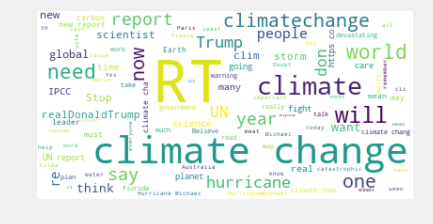

In [12]:
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
positive_wordcloud.to_file("positive_word_cloud_1.png")

In [14]:
t1_negative

Text,Support
RT @OtagoGrad: @anthonyfurey @OskieOckham The data doesn ...,0
The Dow just recorded its 3rd worst day ever. Think @rea ...,0
RT @SimonBanksHB: I am not going to rule out things base ...,0
RT @MikeLevinCA: When asked about climate change my GOP ...,0
RT @gq_jayq: Bet I got 11 years to run it up https://t.c ...,0
No they care about the oil billionaires,0
RT @cathmckenna: The best that science has to offer is t ...,0
RT @tumblindice1979: @elizabethforma @algore I love you ...,0
Global Warming and climate control is fake. GLOBAL WARMI ...,0
RT @HazelMonforton: Literally none of these things will ...,0


In [15]:
negative_tweet_text = t1_negative.select("Text").as_text()
negative_tweet_text

"Text\nRT @OtagoGrad: @anthonyfurey @OskieOckham The data doesn ...\nThe Dow just recorded its 3rd worst day ever. Think @rea ...\nRT @SimonBanksHB: I am not going to rule out things base ...\nRT @MikeLevinCA: When asked about climate change my GOP  ...\nRT @gq_jayq: Bet I got 11 years to run it up https://t.c ...\nNo they care about the oil billionaires\nRT @cathmckenna: The best that science has to offer is t ...\nRT @tumblindice1979: @elizabethforma @algore I love you  ...\nGlobal Warming and climate control is fake. GLOBAL WARMI ...\nRT @HazelMonforton: Literally none of these things will  ...\nRT @pimpnsincebirth: How about you end corporate greed?  ...\nRT @4everlung: Each year about 13 million hectares of fo ...\n@tracyajonas @David_Leavitt @realDonaldTrump it should t ...\nClimate change takes a chronic psychological toll https: ...\nRT @cottoncandaddy: oh so we re like dead dead https://t ...\nRT @VABVOX: Harrowing. And while I'm sure some will say  ...\nRT @JWSpry: WHEN you l

In [16]:
negative_wordcloud = WordCloud(max_words=100, background_color="white").generate(negative_tweet_text)

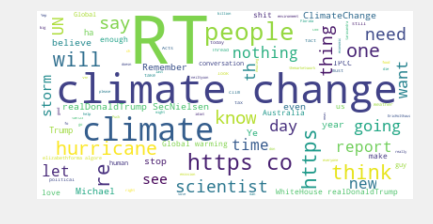

In [17]:
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
negative_wordcloud.to_file("negative_word_cloud_1.png")